In [38]:
import pandas as pd
import dateutil
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
date_comenzi = pd.read_csv('ComenziCSV.csv')
date_clienti = pd.read_csv('ClientiCSV.csv')

In [3]:
def creare_lista_categorii(date_comenzi):
    array_categorii = date_comenzi['Categorie'].unique()
    lista_categorii = []
    for categorie in array_categorii:
        if(categorie == categorie):
            lista_categorii.append(categorie)
    return lista_categorii

In [4]:
def creare_lista_produse(date_comenzi):
    array_produse = date_comenzi['Produs'].unique()
    lista_produse = []
    for produs in array_produse:
        if(produs == produs):
            lista_produse.append(produs)
    return lista_produse

In [5]:
lista_categorii = creare_lista_categorii(date_comenzi)
lista_produse = creare_lista_produse(date_comenzi)

In [6]:
print(lista_categorii)
print(len(lista_categorii))

['Bars', 'Crackers', 'Cookies', 'Snacks']
4


In [7]:
print(lista_produse)
print(len(lista_produse))

['Carrot', 'Whole Wheat', 'Chocolate Chip', 'Arrowroot', 'Potato Chips', 'Oatmeal Raisin', 'Bran', 'Pretzels', 'Banana']
9


In [8]:
dictionar_produse_categorii = {"Carrot":"Bars", "Whole Wheat":"Crackers", "Chocolate Chip":"Cookies", "Arrowroot":"Cookies",
                               "Potato Chips":"Snacks",  "Oatmeat Raisin":"Cookies", "Bran":"Bars", "Pretzels":"Snacks", 
                               "Banana":"Bars"}

In [9]:
print(dictionar_produse_categorii)
print("\nCategoria produsului Banana este: " + dictionar_produse_categorii['Banana'])

{'Carrot': 'Bars', 'Whole Wheat': 'Crackers', 'Chocolate Chip': 'Cookies', 'Arrowroot': 'Cookies', 'Potato Chips': 'Snacks', 'Oatmeat Raisin': 'Cookies', 'Bran': 'Bars', 'Pretzels': 'Snacks', 'Banana': 'Bars'}

Categoria produsului Banana este: Bars


In [10]:
tuplu_categorii = tuple(lista_categorii)
tuplu_categorii.index('Cookies')

2

In [11]:
set_produse = set(lista_produse)
print(set_produse)
set_produse.discard('Pretzels')
print("\nSetul de date dupa eliminarea produsului Pretzels:")
print(set_produse)

{'Potato Chips', 'Oatmeal Raisin', 'Whole Wheat', 'Bran', 'Arrowroot', 'Carrot', 'Pretzels', 'Chocolate Chip', 'Banana'}

Setul de date dupa eliminarea produsului Pretzels:
{'Potato Chips', 'Oatmeal Raisin', 'Whole Wheat', 'Bran', 'Arrowroot', 'Carrot', 'Chocolate Chip', 'Banana'}


In [12]:
print("Printez randurile 80 - 100, si primele 5 coloane")
print(date_comenzi.iloc[80:100, 0:5])

Printez randurile 80 - 100, si primele 5 coloane
    Id_comanda Data_comenzii         Oras Categorie          Produs
80          81     8/29/2020     New York      Bars            Bran
81          82      9/1/2020     New York   Cookies  Oatmeal Raisin
82          83      9/4/2020    San Diego      Bars          Carrot
83          84      9/7/2020       Boston   Cookies       Arrowroot
84          85     9/10/2020       Boston      Bars          Carrot
85          86     9/13/2020       Boston    Snacks        Pretzels
86          87     9/16/2020  Los Angeles      Bars          Carrot
87          88     9/19/2020     New York   Cookies       Arrowroot
88          89     9/22/2020     New York   Cookies  Chocolate Chip
89          90     9/25/2020    San Diego      Bars            Bran
90          91     9/28/2020       Boston   Cookies       Arrowroot
91          92     10/1/2020       Boston      Bars          Carrot
92          93     10/4/2020       Boston  Crackers     Whole Wheat

In [13]:
print(date_comenzi.loc[[2,4,6,8],['Id_comanda', 'Produs', 'Id_client']])

   Id_comanda          Produs  Id_client
2           3  Chocolate Chip          3
4           5       Arrowroot          5
6           7     Whole Wheat          7
8           9          Carrot          9


In [14]:
print("Analizez existenta valorilor lipsa\n")
date_comenzi.info()

Analizez existenta valorilor lipsa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id_comanda     205 non-null    int64  
 1   Data_comenzii  203 non-null    object 
 2   Oras           205 non-null    object 
 3   Categorie      204 non-null    object 
 4   Produs         205 non-null    object 
 5   Cantitate      205 non-null    int64  
 6   Pret_unitar    205 non-null    float64
 7   Id_client      205 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 12.9+ KB


In [15]:
print(date_comenzi[date_comenzi['Categorie'].isna()])

    Id_comanda Data_comenzii      Oras Categorie  Produs  Cantitate  \
32          33      4/7/2020  New York       NaN  Carrot         91   

    Pret_unitar  Id_client  
32         1.77          3  


In [16]:
print(date_comenzi[date_comenzi['Data_comenzii'].isna()])

    Id_comanda Data_comenzii         Oras Categorie          Produs  \
20          21           NaN     New York   Cookies  Chocolate Chip   
31          32           NaN  Los Angeles    Snacks    Potato Chips   

    Cantitate  Pret_unitar  Id_client  
20         85         1.87          1  
31         68         1.68          2  


In [17]:
date_comenzi.iloc[32 ,0:5]

Id_comanda             33
Data_comenzii    4/7/2020
Oras             New York
Categorie             NaN
Produs             Carrot
Name: 32, dtype: object

In [18]:
#Tratarea valorilor lipsa prin completarea categoriei folosind dictionarul
date_comenzi['Categorie'] = date_comenzi['Categorie'].fillna(dictionar_produse_categorii['Carrot'])
date_comenzi.iloc[32 ,0:5]

Id_comanda             33
Data_comenzii    4/7/2020
Oras             New York
Categorie            Bars
Produs             Carrot
Name: 32, dtype: object

In [19]:
#Stergere randuri cu elemente nule
date_comenzi = date_comenzi.dropna()
date_comenzi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id_comanda     203 non-null    int64  
 1   Data_comenzii  203 non-null    object 
 2   Oras           203 non-null    object 
 3   Categorie      203 non-null    object 
 4   Produs         203 non-null    object 
 5   Cantitate      203 non-null    int64  
 6   Pret_unitar    203 non-null    float64
 7   Id_client      203 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 14.3+ KB


In [20]:
date_clienti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id_client    10 non-null     int64 
 1   Nume         10 non-null     object
 2   Prenume      10 non-null     object
 3   Gen          10 non-null     object
 4   Oras         10 non-null     object
 5   Adresa_mail  10 non-null     object
dtypes: int64(1), object(5)
memory usage: 608.0+ bytes


In [21]:
#Stergere coloana Oras din tabela clienti
date_clienti = date_clienti.drop(['Oras'], axis = 1)
date_clienti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id_client    10 non-null     int64 
 1   Nume         10 non-null     object
 2   Prenume      10 non-null     object
 3   Gen          10 non-null     object
 4   Adresa_mail  10 non-null     object
dtypes: int64(1), object(4)
memory usage: 528.0+ bytes


In [22]:
#Crearea unei coloane noi
date_comenzi['Pret_total'] = date_comenzi.Cantitate * date_comenzi.Pret_unitar
date_comenzi.describe()

,Id_comanda,Cantitate,Pret_unitar,Id_client,Pret_total
count,203.000000,203.000000,203.000000,203.000000,203.000000
mean,103.753695,62.768473,2.203596,5.477833,135.806305
std,59.120187,45.632416,0.605366,2.865509,107.771095
min,1.000000,20.000000,1.350000,1.000000,35.280000
25%,53.500000,32.000000,1.770000,3.000000,73.290000
50%,104.000000,48.000000,1.870000,5.000000,104.160000
75%,154.500000,77.000000,2.840000,8.000000,159.170000
max,205.000000,306.000000,3.490000,10.000000,817.920000


In [23]:
print("Valorea totala a vanzarilor: ", date_comenzi['Pret_total'].sum())
print("Valorea maxima a unei vanzari: ", date_comenzi['Pret_total'].max())

Valorea totala a vanzarilor:  27568.68
Valorea maxima a unei vanzari:  817.92


In [24]:
print('Suma vanzarilor pentru fiecare categorie de produse')
print(date_comenzi.groupby('Categorie')['Pret_total'].sum())

print('Suma vanzarilor pentru fiecare produs')
print(date_comenzi.groupby('Produs')['Pret_total'].sum())

Suma vanzarilor pentru fiecare categorie de produse
Categorie
Bars         9216.51
Cookies     13397.01
Crackers     2973.48
Snacks       1981.68
Name: Pret_total, dtype: float64
Suma vanzarilor pentru fiecare produs
Produs
Arrowroot         3976.32
Banana             179.33
Bran              2374.90
Carrot            6662.28
Chocolate Chip    3229.49
Oatmeal Raisin    6191.20
Potato Chips      1461.93
Pretzels           519.75
Whole Wheat       2973.48
Name: Pret_total, dtype: float64


In [25]:
date_comenzi['Data_comenzii'] = date_comenzi['Data_comenzii'].apply(dateutil.parser.parse, dayfirst=False)


In [26]:
print(date_comenzi.dtypes)

Id_comanda                int64
Data_comenzii    datetime64[ns]
Oras                     object
Categorie                object
Produs                   object
Cantitate                 int64
Pret_unitar             float64
Id_client                 int64
Pret_total              float64
dtype: object


In [27]:
date_comenzi_clienti = pd.merge(date_comenzi, date_clienti[['Id_client', 'Nume', 'Prenume', 'Gen']], on='Id_client')
print(date_comenzi_clienti)

     Id_comanda Data_comenzii         Oras Categorie          Produs  \
0             1    2020-01-01       Boston      Bars          Carrot   
1            11    2020-01-31       Boston   Cookies       Arrowroot   
2            31    2020-04-01  Los Angeles      Bars          Carrot   
3            41    2020-05-01    San Diego   Cookies  Chocolate Chip   
4            51    2020-05-31       Boston  Crackers     Whole Wheat   
..          ...           ...          ...       ...             ...   
198         160    2021-04-22    San Diego   Cookies  Chocolate Chip   
199         170    2021-05-22  Los Angeles   Cookies  Chocolate Chip   
200         180    2021-06-21    San Diego      Bars          Carrot   
201         190    2021-07-21       Boston   Cookies  Chocolate Chip   
202         200    2021-08-20     New York      Bars            Bran   

     Cantitate  Pret_unitar  Id_client  Pret_total    Nume    Prenume Gen  
0           33         1.77          1       58.41  Tataru 

In [35]:
#grafice cu vanzarile cu toate categoriile de produse
def printare_grafice(date_comenzi, lista_categorii):
    for categorie in lista_categorii:
        plot_data=date_comenzi[date_comenzi['Categorie']==categorie]
        plot_data=plot_data.groupby('Produs')['Pret_total'].sum()
        plot_data.sort_values().plot(kind='bar')
        plt.xlabel(categorie)
        plt.show()

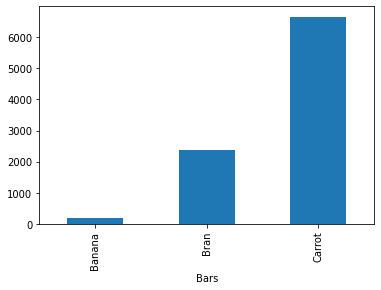

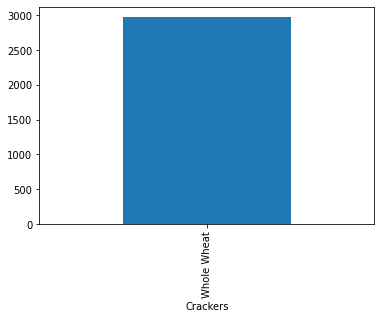

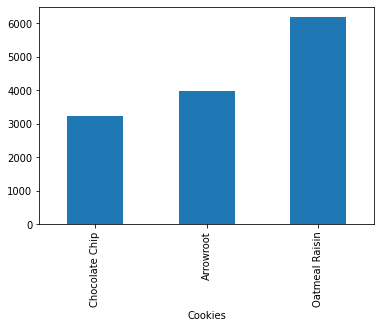

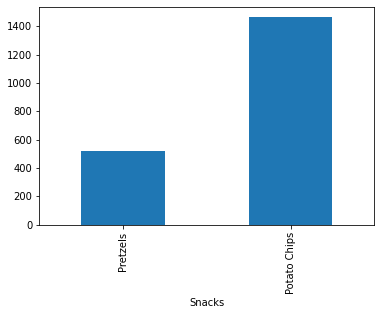

In [36]:
printare_grafice(date_comenzi, lista_categorii)

In [44]:
print(lista_categorii)

['Bars', 'Crackers', 'Cookies', 'Snacks']


In [51]:
date_comenzi.replace({'Carrot':0, 'Whole Wheat':1, 'Chocolate Chip' : 2, 'Arrowroot':3, 'Potato Chips':4, 'Oatmeal Raisin':5, 'Bran':6, 'Pretzels':7, 'Banana':8}, inplace=True)
date_comenzi.replace({'Bars':0, 'Crackers':1, 'Cookies':2, 'Snacks':3}, inplace=True)

In [52]:
coloane_finale = ['Produs', 'Categorie', 'Pret_total']
date_comenzi_train = date_comenzi[coloane_finale]


In [61]:
date_comenzi_train.info()
date_comenzi_train = date_comenzi_train.to_numpy()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203 entries, 0 to 204
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Produs      203 non-null    int64  
 1   Categorie   203 non-null    int64  
 2   Pret_total  203 non-null    float64
dtypes: float64(1), int64(2)
memory usage: 6.3 KB


[[  2.66906475   1.23021583  84.58388489]
 [  3.76923077   1.76923077 465.63769231]
 [  2.49019608   1.11764706 191.33784314]]
[0 2 0 2 0 0 1 0 2 0 0 0 0 0 0 0 0 1 0 0 0 0 2 2 0 0 0 2 1 0 2 0 0 0 2 0 0
 0 0 2 1 0 0 0 0 0 0 0 0 1 2 0 0 0 0 1 0 2 2 0 0 2 2 2 0 2 0 0 0 1 2 0 0 0
 0 2 0 2 2 2 0 0 2 0 2 2 0 0 2 0 0 0 2 1 2 0 0 0 0 2 0 0 2 2 0 0 2 0 0 2 2
 0 0 0 2 0 0 1 0 2 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 2 2 0 2 0 2 0
 0 2 2 0 1 2 0 0 0 0 0 1 2 0 0 0 2 0 0 0 2 0 0 0 1 0 0 0 0 0 0 0 0 0 2 0 0
 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 0 0]


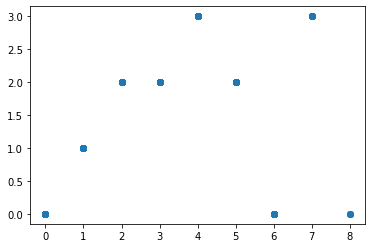

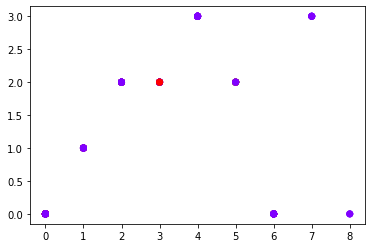

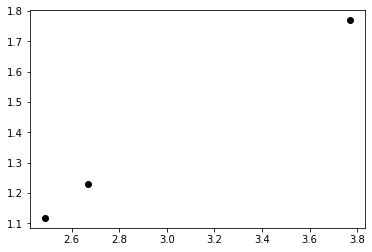

In [62]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(date_comenzi_train)
print(kmeans.cluster_centers_)
print(kmeans.labels_)
f1 = plt.figure()
plt.scatter(date_comenzi_train[:,0],date_comenzi_train[:,1], label='True Position')
f2 = plt.figure()
plt.scatter(date_comenzi_train[:,0], date_comenzi_train[:,1], c=kmeans.labels_, cmap='rainbow')
f3 = plt.figure()
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.show()
